### Description: This program detects breast cancer based on data

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('data.csv')

In [4]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [5]:
# Count the number of rows and columns in the data set
df.shape

(569, 33)

In [6]:
# Count the number of empty values (i.e. NaN, NAN, na) in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Drop the column with all missing values
df = df.dropna(axis = 1)

In [8]:
# Get the new count of the number of rows and column
df.shape

(569, 32)

In [9]:
# Get a count of the number of Malignant (M) or Benign (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

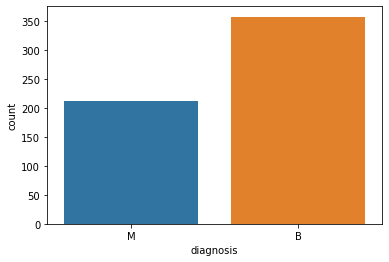

In [10]:
# Visualize the count
sns.countplot(df['diagnosis'], label = 'count')

In [11]:
# Look at the data type to see which columns need to ne encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
# Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


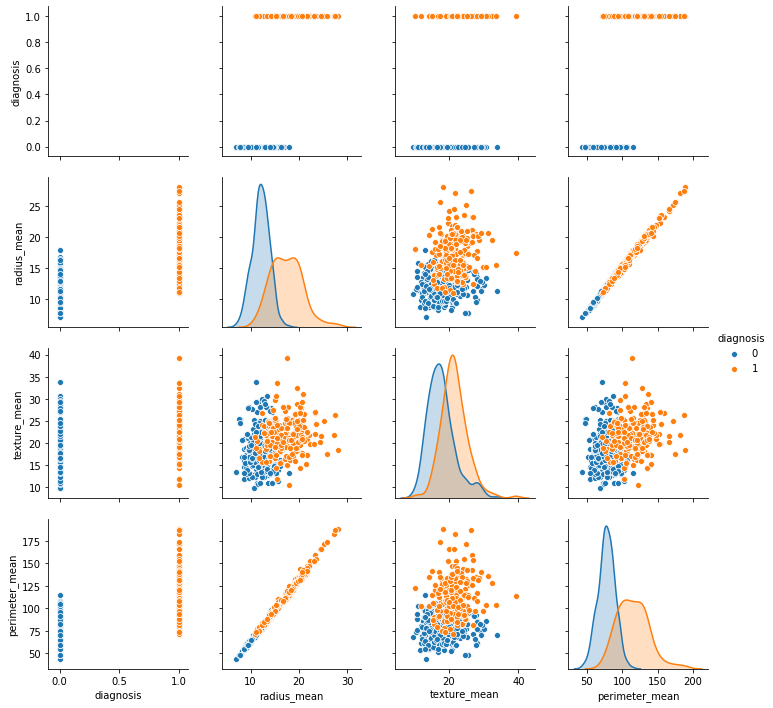

In [13]:
# Create a pair plot
sns.pairplot(df.iloc[:, 1:5], hue = 'diagnosis')

In [14]:
# Print the first 5 rows of the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Get the correlation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


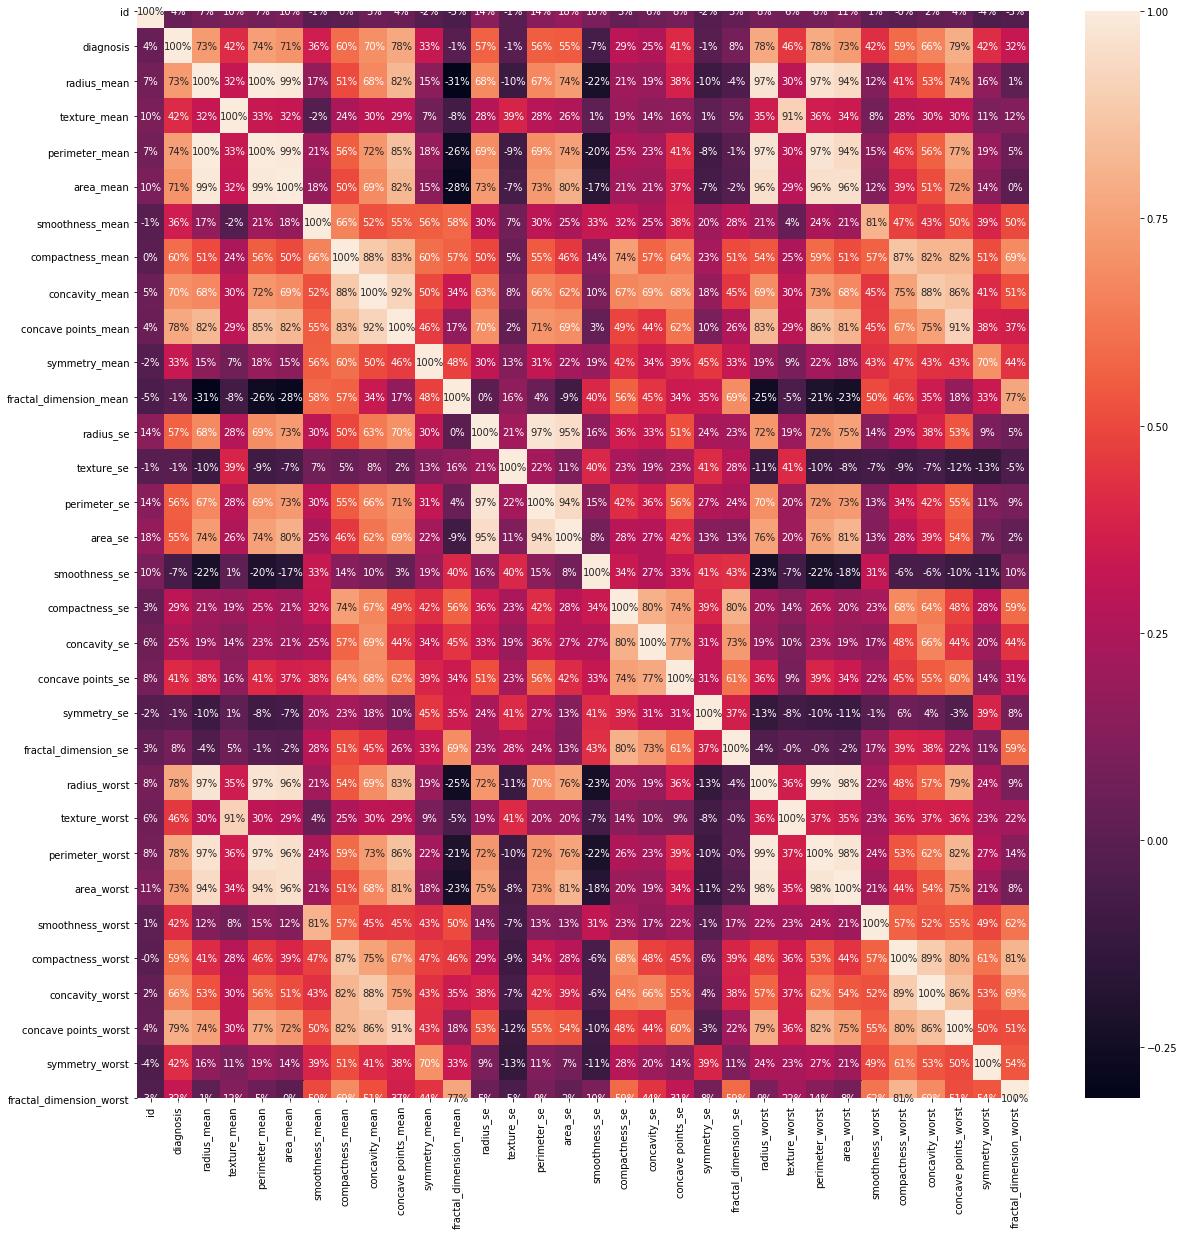

In [16]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(), annot = True, fmt ='.0%')

In [17]:
# Splitting the data into a feature data set (X) and a target data set (Y)
X = df.iloc[:,2:]
Y = df.iloc[:,1]

In [18]:
# Split the data into 75% training and 25% testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [19]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
# Create functions for different models
def models (X_train, Y_train):
    # Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    # Using KNN Classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    # Using SVC Linear
    from sklearn.svm import SVC
    svc_ln = SVC(kernel = 'linear', random_state = 0)
    svc_ln.fit(X_train, Y_train)
    
    # Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'linear', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

    # Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    # Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    # Using RandonForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    # Print model accuracy on the training data
    print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    
    print('[1] KNN Training Accuracy:', knn.score(X_train, Y_train))
    
    print('[2] SVM (Linear Classifier) Training Accuracy:', svc_ln.score(X_train, Y_train))
    
    print('[3] SMV (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    
    print('[4] Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    
    print('[5] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    
    print('[6] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, knn, svc_ln, svc_rbf, gauss, tree, forest
       

In [21]:
# Create the model that contains all of the models, and look at the accuracy score
model = models(X_train, Y_train)

C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0] Logistic Regression Training Accuracy: 0.9906103286384976
[1] KNN Training Accuracy: 0.9741784037558685
[2] SVM (Linear Classifier) Training Accuracy: 0.9859154929577465
[3] SMV (RBF Classifier) Training Accuracy: 0.9859154929577465
[4] Gaussian Naive Bayes Training Accuracy: 0.9483568075117371
[5] Decision Tree Classifier Training Accuracy: 1.0
[6] Random Forest Classifier Training Accuracy: 0.9976525821596244


In [22]:
# Confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    print(cm)
    
      
    print('Model[{}] Testing Accuracy = "{}"'.format(i, (TP + TN)/(TP + TN + FN + FP)))
    print() # print a new line
    
   

[[86  4]
 [ 2 51]]
Model[0] Testing Accuracy = "0.958041958041958"

[[89  1]
 [ 6 47]]
Model[1] Testing Accuracy = "0.951048951048951"

[[85  5]
 [ 2 51]]
Model[2] Testing Accuracy = "0.951048951048951"

[[85  5]
 [ 2 51]]
Model[3] Testing Accuracy = "0.951048951048951"

[[86  4]
 [ 5 48]]
Model[4] Testing Accuracy = "0.9370629370629371"

[[85  5]
 [ 3 50]]
Model[5] Testing Accuracy = "0.9440559440559441"

[[88  2]
 [ 1 52]]
Model[6] Testing Accuracy = "0.9790209790209791"



In [23]:
# Other ways to get the classification accuracy & metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model',i)
    #Check precision, recall, f1-score
    print(classification_report(Y_test, model[i].predict(X_test)))
    
    # Model Accuracy
    print(accuracy_score(Y_test, model[i].predict(X_test)))
    print() # print a new line


Model 0
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

Model 1
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 2
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg

From the accuracy and metrics above, the model that performed the best on the test data was the Random Forest Classifier with an accuracy score of about 98%. So I will choose that model to detect cancer cells in patients. Make the prediction/classification on the test data and show both the Random Forest Classifier model classification/prediction and the actual values of the patient that shows rather or not they have cancer.

In [24]:
# Random Forest Classifier performed the best with an accuracy of 98.60%
# Print prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

print() # print a space

# Print the actual values
print(Y_test.values)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


### Observation
The model misdiagnosed a few patients as having cancer when they didn’t and it misdiagnosed patients that did have cancer as not having cancer. Although this model is good, when dealing with the lives of others I want this model to be better and get it’s accuracy as close to 100% as possible or at least as good as if not better than doctors. So a little more tuning of each of the models is necessary.